## Step 0:
  * Is to import the important libraries

In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.0.0'

### Working on mnist dataset -
*  1:This dataset contains handwritten digits.
*  2:It has 10 classes i.e. 0 to 9
*  3:Each data point is 2D array of 28x28 size.
*  Keras already contain MNIST dataset . So, We can import directly by keras api

In [3]:
mnist=tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [4]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
X_train_full.shape

(60000, 28, 28)

* Now , We create a validation data setr from traning data set .
* We also Scale the value b/w 0 to 1. To scale it we divide value by 255 * ,because in RGB scale it goes to 0-255 range.
* 0 means black and 255 means white .It is all about the shades.

In [6]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

# scale the test set as well
X_test=X_test/255.0

* If you want to show the test data in image format.

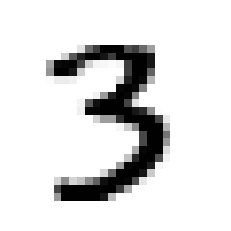

In [7]:
#Lets view first data point
plt.imshow(X_train[5000],cmap="binary")
plt.axis('off')
plt.show()

* Now we see the heatmap of training data

<AxesSubplot:>

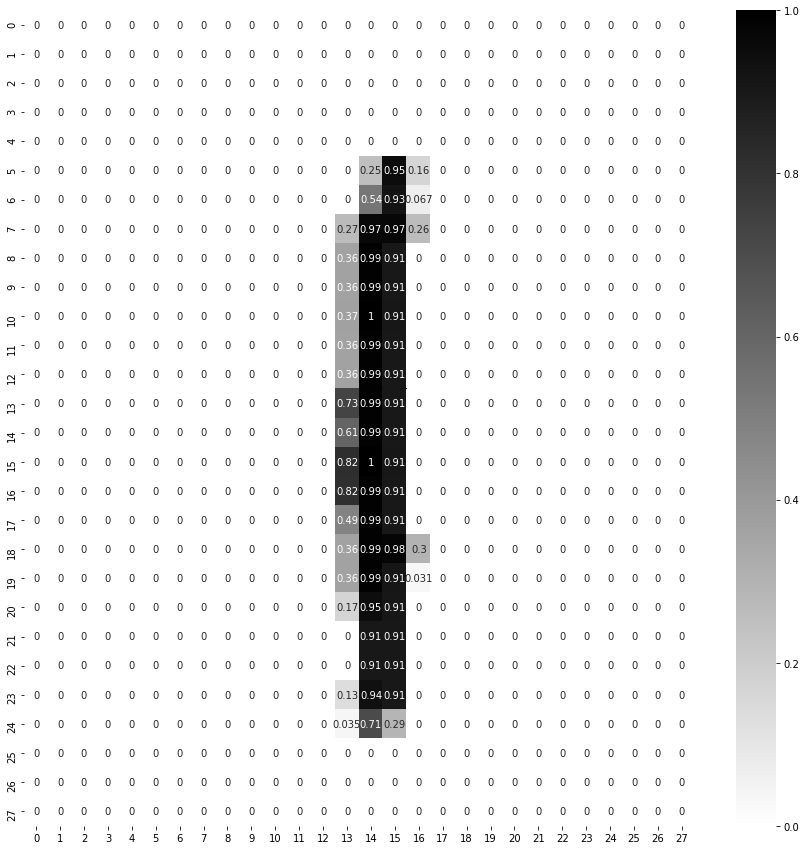

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[9000],annot=True,cmap="binary")

In [9]:
X_train.shape

(55000, 28, 28)

#### Now We are ready to make neural network and add different layers with activation function.

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28],name="inputLayer"))
model.add(tf.keras.layers.Dense(300, activation="relu",name="hiddenLayer1"))
model.add(tf.keras.layers.Dense(100, activation="relu",name="hiddenLayer2"))
model.add(tf.keras.layers.Dense(10, activation="softmax",name="outputLayer"))

In [21]:
#to check the number of layer 
model.layers

In [22]:
#to check the summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### How to find total no of parameters

In [23]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [24]:
sum((235500,30100,1010))

266610

In [28]:
model.layers[1].get_weights()

[array([[-0.06170803,  0.01130824,  0.01248096, ...,  0.00584489,
          0.05382715,  0.0670542 ],
        [-0.06950835,  0.0331374 ,  0.00502398, ..., -0.02103195,
          0.07002988, -0.00940721],
        [-0.02515966, -0.07268933, -0.06437388, ..., -0.02012962,
         -0.01205342, -0.07127693],
        ...,
        [-0.0636734 , -0.049967  , -0.0356715 , ...,  0.04218189,
          0.02962668,  0.06371187],
        [ 0.06066953,  0.04278181, -0.05843654, ...,  0.03614189,
          0.07253771,  0.02226368],
        [ 0.03646592,  0.01252862, -0.02318862, ..., -0.03428332,
          0.00073009,  0.0519675 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [30]:
weights,bais=model.layers[1].get_weights()

In [33]:
print(weights.shape)
print(bais.shape)

(784, 300)
(300,)


### Now we want to assign loss function ,optimizers and accuracy metrics

In [35]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [36]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 12s 211us/sample - loss: 0.5955 - accuracy: 0.8452 - val_loss: 0.3007 - val_accuracy: 0.9190
Epoch 2/30
55000/55000 [==============================] - 10s 186us/sample - loss: 0.2890 - accuracy: 0.9170 - val_loss: 0.2347 - val_accuracy: 0.9326
Epoch 3/30
55000/55000 [==============================] - 9s 169us/sample - loss: 0.2364 - accuracy: 0.9330 - val_loss: 0.2082 - val_accuracy: 0.9442
Epoch 4/30
55000/55000 [==============================] - 9s 172us/sample - loss: 0.2018 - accuracy: 0.9426 - val_loss: 0.1789 - val_accuracy: 0.9528
Epoch 5/30
55000/55000 [==============================] - 9s 171us/sample - loss: 0.1754 - accuracy: 0.9497 - val_loss: 0.1547 - val_accuracy: 0.9592
Epoch 6/30
55000/55000 [==============================] - 10s 177us/sample - loss: 0.1548 - accuracy: 0.9550 - val_loss: 0.1431 - val_accuracy: 0.9632
Epoch 7/30
55000/55000 [========================

### How to save this model in our local system

In [37]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")


In [40]:
UNIQUE_PATH = model.save(saveModel_path()) 

your model will be saved at the following location
SAVED_MODELS\Model_2020_12_14_19_08_17_.h5


TypeError: expected str, bytes or os.PathLike object, not NoneType

In [41]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [42]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.595451,0.845200,0.300749,0.9190
1,0.288996,0.916964,0.234683,0.9326
2,0.236395,0.933000,0.208216,0.9442
3,0.201781,0.942600,0.178896,0.9528
4,0.175402,0.949673,0.154715,0.9592
5,0.154788,0.955000,0.143128,0.9632
6,0.137993,0.960200,0.129175,0.9626
7,0.124479,0.963909,0.119793,0.9662
8,0.112764,0.967545,0.111595,0.9716
9,0.102978,0.970418,0.106103,0.9708


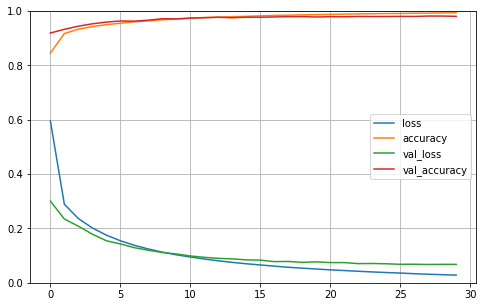

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Now We check the accuracy or give our test data to predicting the results

In [44]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06969959775675089, 0.9785]

### We pass first three data to predict our model 

In [45]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

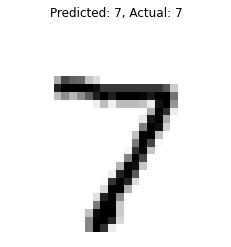

------------------------------------------------------------


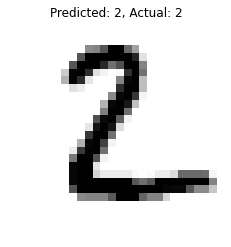

------------------------------------------------------------


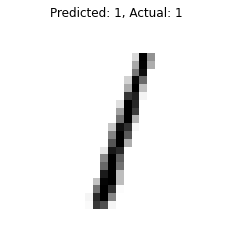

------------------------------------------------------------


In [48]:
for data, pred, actual in zip(X_new, y_pred, y_test):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

## Hey!! Congrats you make your first Neural network model. They also predict all results true.                                                
###                                                                         Great !!!